# Obtain the data

In [432]:
#Run this code block, Don't change anything
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

cal = datasets.fetch_california_housing()
X = cal.data
y = cal.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_bool_train = [i > 1.8 for i in y_train]
y_bool_test = [i > 1.8 for i in y_test]

print("NOTE! Please run the cells in order, lots of variables are reused and reassigned. Values may wary based on order of execution.")

NOTE! Please run the cells in order, lots of variables are reused and reassigned. Values may wary based on order of execution.


# Q1

### Q1a.

#### Your code

In [433]:
# !pip install xgboost

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# model = GradientBoostingClassifier(random_state=0)

X_train_gb = X_train
Y_train_gb = y_train

param_distributions = {
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05],
    "max_depth": [1,3,5,7,9,11]
}
grid_search_val = GridSearchCV(
    GradientBoostingRegressor(), param_distributions, verbose=1, n_jobs=-1, cv=5
)
grid_search_val.fit(X_train_gb, Y_train_gb) 
# grid_search_val.fit(X_train,y_train) 
grid_search_val.best_params_
grid_search_val.best_estimator_ 

cv_results = pd.DataFrame(grid_search_val.cv_results_)
print("Top 5 results based on the gridsearch:\n\n", cv_results.nlargest(5, "mean_test_score"))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Top 5 results based on the gridsearch:

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
28      13.321992      0.080406         0.043624        0.025154   
27      10.395087      0.150640         0.025706        0.002930   
22      12.703906      0.083156         0.034053        0.001696   
29      13.715162      0.909250         0.037243        0.000655   
21      10.092182      0.040122         0.024983        0.001360   

   param_learning_rate param_max_depth  \
28                0.05               9   
27                0.05               7   
22                0.04               9   
29                0.05              11   
21                0.04               7   

                                      params  split0_test_score  \
28   {'learning_rate': 0.05, 'max_depth': 9}           0.814435   
27   {'learning_rate': 0.05, 'max_depth': 7}           0.813678   
22   {'learning_rate': 0.04, 'max_

#### conclusion

In [434]:
print('Q1a. Conclusion:')
print('\nBest parameters based on the grid search')
print(' ', grid_search_val.best_params_)
print('\nBest estimator/classifier from the grid search')
print(' ', grid_search_val.best_estimator_) 

predictions = grid_search_val.best_estimator_.predict(X_test) 

print('\nDetermination coefficient(r2) score on test set is {} '.format(r2_score(predictions, y_test))) 

print()
# grid_search_val.get_params

Q1a. Conclusion:

Best parameters based on the grid search
  {'learning_rate': 0.05, 'max_depth': 9}

Best estimator/classifier from the grid search
  GradientBoostingRegressor(learning_rate=0.05, max_depth=9)

Determination coefficient(r2) score on test set is 0.7885693134153988 



### Q1b.

#### plot

In [435]:
cv_results = pd.DataFrame(grid_search_val.cv_results_)
print(cv_results.head())

print()
print("Selecting values mean_test_score, param_learning_rate and param_max_depth from the grid search results.")
r2_score_list = cv_results['mean_test_score']
learning_rate_plot = cv_results['param_learning_rate']
depth_row_plot = cv_results['param_max_depth']

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.070876      0.279791         0.005747        0.001099   
1       5.454230      0.030458         0.011555        0.000895   
2       7.789216      0.076201         0.017231        0.000218   
3      10.298696      0.046296         0.025480        0.000503   
4      12.646030      0.056151         0.035078        0.001189   

  param_learning_rate param_max_depth  \
0                0.01               1   
1                0.01               3   
2                0.01               5   
3                0.01               7   
4                0.01               9   

                                    params  split0_test_score  \
0  {'learning_rate': 0.01, 'max_depth': 1}           0.332965   
1  {'learning_rate': 0.01, 'max_depth': 3}           0.514781   
2  {'learning_rate': 0.01, 'max_depth': 5}           0.594032   
3  {'learning_rate': 0.01, 'max_depth': 7}           0.634171   
4  {'learning_rate': 0.01

#### conclusion

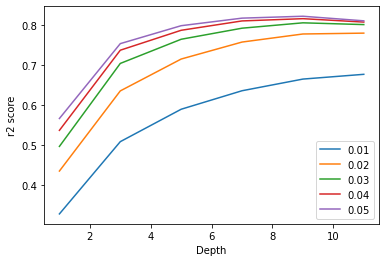

Q1b. conclusion:
From the graph, we can see that initially increasing value of depth and learning rate shows massive improvement in the performance, but after a certaing value the gains plateau, we only see minimal improvements with increasing depth and learning_rate. Finally, we see a decline in performance post a certain limit showing that there is a balance of both depth and learning rate that is necessary to be maintained, and infinitely increasing values doesnt work and even results in decline of performance.


In [436]:
plt.plot(depth_row_plot[0:6], r2_score_list[0:6], label="0.01")
plt.plot(depth_row_plot[6:12], r2_score_list[6:12], label="0.02")
plt.plot(depth_row_plot[12:18], r2_score_list[12:18], label="0.03")
plt.plot(depth_row_plot[18:24], r2_score_list[18:24], label="0.04")
plt.plot(depth_row_plot[24:30], r2_score_list[24:30], label="0.05")
plt.legend()
plt.xlabel("Depth")
plt.ylabel("r2 score")
plt.show()
print('Q1b. conclusion:')
print('From the graph, we can see that initially increasing value of depth and learning rate shows massive improvement in the performance, but after a certaing value the gains plateau, we only see minimal improvements with increasing depth and learning_rate. Finally, we see a decline in performance post a certain limit showing that there is a balance of both depth and learning rate that is necessary to be maintained, and infinitely increasing values doesnt work and even results in decline of performance.')

### Q1c.

In [437]:
print('Q1c) \n')
print('Methods to further improve performance')
print('\na) Feature selection and scaling: Thinning the number of values that positively affect and are correlated to the overall price. Once selected, we standardize the value ranges to improve the performance further.')
print('\nb) Boosting algorithms: Sequentially training multiple models to increase accuracy is a better way to move forward.')
print('\nc) Further Hyperparameter Tuning: Trying different loss functions, subsampling values to increase or reduce bias and variance, different criterion etc.')
print('\nd) Number of trees: Finding the right amount trees prevent overfitting and underfitting values.')

Q1c) 

Methods to further improve performance

a) Feature selection and scaling: Thinning the number of values that positively affect and are correlated to the overall price. Once selected, we standardize the value ranges to improve the performance further.

b) Boosting algorithms: Sequentially training multiple models to increase accuracy is a better way to move forward.

c) Further Hyperparameter Tuning: Trying different loss functions, subsampling values to increase or reduce bias and variance, different criterion etc.

d) Number of trees: Finding the right amount trees prevent overfitting and underfitting values.


# Q2.

### Q2a.

#### your code

In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

print("Models used here are:")
logit = LogisticRegression(solver='liblinear')
print("- ", logit)
logit.fit(X_train, y_bool_train)
# predicted = cross_validation.cross_val_predict(logit, X_train, y_bool_train, cv=10)
logit_score = cross_val_score(logit, X_train, y_bool_train, cv=5, scoring='f1')

dTree = DecisionTreeClassifier()
print("- ", dTree)
dTree_score = cross_val_score(dTree, X_train, y_bool_train, cv=5, scoring='f1')

knn = KNeighborsClassifier()
print("- ", knn)
knn_score = cross_val_score(dTree, X_train, y_bool_train, cv=5, scoring='f1')
# print(metrics.classification_report(y_train, score))

Models used here are:
-  LogisticRegression(solver='liblinear')
-  DecisionTreeClassifier()
-  KNeighborsClassifier()


#### conclusion

In [439]:
print('Q2a. conclusion:')

print("\nLogistic regression cross validation score")
print(logit_score.mean())
print()

print("\nDecisionTreeClassifier cross validation score")
print(dTree_score.mean())
print()

print("\nKNeighborsClassifier cross validation score")
print(knn_score.mean())

Q2a. conclusion:

Logistic regression cross validation score
0.8059569251928537


DecisionTreeClassifier cross validation score
0.8359640774510414


KNeighborsClassifier cross validation score
0.8371371947370714


### Q2b.

#### your code

In [440]:
# dTree = DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=4, min_samples_leaf=12)
# score = cross_val_score(dTree, X_train, y_bool_train, cv=5)
# print("DecisionTreeClassifier cross validation score \n", score.mean())
# dTree.fit(X_train, y_bool_train) 
# y_pred = dTree.predict(X_test)
# print('DecisionTreeClassifier f1 score \n', f1_score(y_bool_test, y_pred))

dTree = DecisionTreeClassifier()
# Tried log loss criterion but ran into an error.
param_distributions = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [7, 8, 9, 10, 11, 12, 13, 14],
    "min_samples_split": [3, 4, 5, 6, 7],
    "min_samples_leaf": [7, 8, 9, 10, 11, 12, 13, 14]
}

print("Out of all the tunable parameters in the decision trees. I narrowed down to 4 parameters for the following reasons:\n")
print(" - Criterion: This decides which criteria to consider while considering a split to a more specific subset, Gini and entropy were the main two contenders here, so added them to the grid search. \n")
print(" - Depth: Since each split of the data can have further sub split, this kind of bifuracation helps decision trees to fit data better but this is again only to a certain extent, further increase results in overfitting and reduction in accuracy. \n")
print(" - Min Sample split: The minimum number of samples for a particular node so that it can be split. This parameter helps regularizing the tree. \n")
print(" - Min Sample leaf: The minimum number of samples for a node to be considered a leaf node, Helps limit the tree growth. \n")
print()

grid_search_val = GridSearchCV(dTree, param_distributions, verbose=1, n_jobs=-1, cv=5)

grid_search_val.fit(X_train, y_bool_train) 

y_pred = grid_search_val.best_estimator_.predict(X_test)


Out of all the tunable parameters in the decision trees. I narrowed down to 4 parameters for the following reasons:

 - Criterion: This decides which criteria to consider while considering a split to a more specific subset, Gini and entropy were the main two contenders here, so added them to the grid search. 

 - Depth: Since each split of the data can have further sub split, this kind of bifuracation helps decision trees to fit data better but this is again only to a certain extent, further increase results in overfitting and reduction in accuracy. 

 - Min Sample split: The minimum number of samples for a particular node so that it can be split. This parameter helps regularizing the tree. 

 - Min Sample leaf: The minimum number of samples for a node to be considered a leaf node, Helps limit the tree growth. 


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


#### report final model

In [441]:
cv_results = pd.DataFrame(grid_search_val.cv_results_)

print("Top 5 results based on the gridsearch:\n\n", cv_results.nlargest(5,"mean_test_score"))

print('\nQ2b. Final model:')
print('\nBest parameters based on the grid search')
print(' ', grid_search_val.best_params_)
print('\nBest estimator/classifier from the grid search')
print(' ', grid_search_val.best_estimator_) 

dtree_score = cross_val_score(grid_search_val.best_estimator_, X_train, y_bool_train, cv=5, scoring='f1')
print('VotingClassifier cross validation f1 score \n', dtree_score.mean())
print()
print('VotingClassifier test data classification score\n', accuracy_score(y_bool_test, y_pred))
print()
print('VotingClassifier test f1 score \n', f1_score(y_bool_test, y_pred))

Top 5 results based on the gridsearch:

      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
543       0.185027      0.001706         0.002548        0.000449   
507       0.179250      0.002690         0.002140        0.000400   
539       0.184471      0.002891         0.002340        0.000395   
536       0.184683      0.002091         0.002794        0.000458   
535       0.187264      0.004783         0.002616        0.000085   

    param_criterion param_max_depth param_min_samples_leaf  \
543         entropy              12                     11   
507         entropy              11                     12   
539         entropy              12                     10   
536         entropy              12                     10   
535         entropy              12                     10   

    param_min_samples_split  \
543                       6   
507                       5   
539                       7   
536                       4   
535             

# Q3.

### Q3a.

#### your code

In [461]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

estimator = [
('DTree1' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree2' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree3' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree4' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree5' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree6' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree7' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree8' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree9' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree10' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
('DTree11' , DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11, max_features='sqrt')),
]

eclf = VotingClassifier(estimators=estimator, voting='soft')
score = cross_val_score(eclf, X_train, y_bool_train, cv=5, scoring='f1')
eclf.fit(X_train, y_bool_train)
y_pred = eclf.predict(X_test)

# Vs 0.8628266

#### conclusion

In [462]:
print('Q3a. conclusion:')

print('VotingClassifier f1 cross validation score \n', score.mean())
print('VotingClassifier classification \n', accuracy_score(y_bool_test, y_pred))
print('VotingClassifier f1 score \n', f1_score(y_bool_test, y_pred))

print('\nVoting Classifier overall performs slightly better with a f1 score of 0.876 compared to 0.8619 in only Dtree classifier. Changing the voting to hard does improve it a bit but not by too much. Additionally since the voting process is more democratised there are less chances for outlier to influence the decision of a voting classifier compared to D tree.In general, ensemble models combine multiple base models to improve the predicting performance')

Q3a. conclusion:
VotingClassifier f1 cross validation score 
 0.878062028556642
VotingClassifier classification 
 0.8670058139534884
VotingClassifier f1 score 
 0.8652760736196319

Voting Classifier overall performs slightly better with a f1 score of 0.876 compared to 0.8619 in only Dtree classifier. Changing the voting to hard does improve it a bit but not by too much. Additionally since the voting process is more democratised there are less chances for outlier to influence the decision of a voting classifier compared to D tree.In general, ensemble models combine multiple base models to improve the predicting performance


### Q3b.

#### your code

In [463]:
model = KNeighborsClassifier()

# Comment the below 2 lines after the first run.
for idx in range(0, 11, 1):
    estimator.append(('KNN'+ str(idx),  model))
    
eclfNew = VotingClassifier(estimators=estimator, voting='soft')
score = cross_val_score(eclfNew, X_train, y_bool_train, cv=5, scoring='f1')
eclf.fit(X_train, y_bool_train)
y_pred = eclf.predict(X_test)
# Vs 0.8628266

#### conclusion

In [465]:
print('Q3b. conclusion:')

print('VotingClassifier f1 cross validation score \n', score.mean())

print('VotingClassifier classification \n', accuracy_score(y_bool_test, y_pred))
print('VotingClassifier f1 score \n', f1_score(y_bool_test, y_pred))
print()

print('Decision trees build a classification model based on the training set and arent the best at learning an unforeseen observation, as compared to KNN which models well to test data on the spot, because of this the two models performance on the dataset would vary quite a bit and their collective voting would skew the results. Additionally, decision trees are known to prune data points that are rare occurrences compared to KNN which would handle them better, this would also result in a more skewed voting result. Finally, based on this observation its ideal to not combine models that work differently in a counterproductive way')

Q3b. conclusion:
VotingClassifier f1 cross validation score 
 0.8261171056369274
VotingClassifier classification 
 0.8403585271317829
VotingClassifier f1 score 
 0.8367599702749566

Decision trees build a classification model based on the training set and arent the best at learning an unforeseen observation, as compared to KNN which models well to test data on the spot, because of this the two models performance on the dataset would vary quite a bit and their collective voting would skew the results. Additionally, decision trees are known to prune data points that are rare occurrences compared to KNN which would handle them better, this would also result in a more skewed voting result. Finally, based on this observation its ideal to not combine models that work differently in a counterproductive way


### Q3c.

#### your code

In [466]:
from sklearn.metrics import accuracy_score, f1_score

bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=12, criterion="entropy", min_samples_split=3, min_samples_leaf=11))
param_distributions = {
    "max_features": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

grid_search_val = GridSearchCV(bagging, param_distributions, verbose=1, n_jobs=-1, cv=5)

grid_search_val.fit(X_train, y_bool_train) 

y_pred = grid_search_val.best_estimator_.predict(X_test)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


#### report best model and performance on testing data

In [467]:
print('Q3c.')

print('Best parameters based on the grid search', grid_search_val.best_params_)
print('Best Estimator model based on the grid search', grid_search_val.best_estimator_) 

print()
print('BaggingClassifier test classification \n', accuracy_score(y_bool_test, y_pred))
print('BaggingClassifier test f1 score \n', f1_score(y_bool_test, y_pred))

Q3c.
Best parameters based on the grid search {'max_features': 0.7}
Best Estimator model based on the grid search BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=12,
                                                        min_samples_leaf=11,
                                                        min_samples_split=3),
                  max_features=0.7)

BaggingClassifier test classification 
 0.9045542635658915
BaggingClassifier test f1 score 
 0.9030988686669945


### Q3d.

#### your code

In [468]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

eclf_new_ada = AdaBoostClassifier()
score_ada = cross_val_score(eclf_new_ada, X_train, y_bool_train, cv=5, scoring='f1')
eclf_new_ada.fit(X_train, y_bool_train)
y_pred_ada = eclf_new_ada.predict(X_test)

eclf_new_GBC = GradientBoostingClassifier()
score_GBC = cross_val_score(eclf_new_GBC, X_train, y_bool_train, cv=5, scoring='f1')

eclf_new_GBC.fit(X_train, y_bool_train)
y_pred_GBC = eclf_new_GBC.predict(X_test)

eclf_new_RFC = RandomForestClassifier()
score_RFC = cross_val_score(eclf_new_RFC, X_train, y_bool_train, cv=5, scoring='f1')
eclf_new_RFC.fit(X_train, y_bool_train)
y_pred_RFC = eclf_new_RFC.predict(X_test)

eclf_new_ETC = ExtraTreesClassifier()
score_ETC = cross_val_score(eclf_new_ETC, X_train, y_bool_train, cv=5, scoring='f1')
eclf_new_ETC.fit(X_train, y_bool_train)
y_pred_ETC = eclf_new_ETC.predict(X_test)

eclf_new_hist = HistGradientBoostingClassifier()
score_hist = cross_val_score(eclf_new_hist, X_train, y_bool_train, cv=5, scoring='f1')
eclf_new_hist.fit(X_train, y_bool_train)
y_pred_hist = eclf_new_hist.predict(X_test)

#### report result

In [430]:
print('Q3d.')
print("AdaBoostClassifier cross validation score\n", score_ada.mean())
print('AdaBoostClassifier test classification \n', accuracy_score(y_bool_test, y_pred_ada))
print('AdaBoostClassifier test f1 score \n', f1_score(y_bool_test, y_pred_ada))

print("\nGradientBoostingClassifier cross validation score\n", score_GBC.mean())
print('GradientBoostingClassifier test classification \n', accuracy_score(y_bool_test, y_pred_GBC))
print('GradientBoostingClassifier test f1 score \n', f1_score(y_bool_test, y_pred_GBC))

print("\nRandomForestClassifier cross validation score\n", score_RFC.mean())
print('RandomForestClassifier test classification \n', accuracy_score(y_bool_test, y_pred_RFC))
print('RandomForestClassifier test f1 score \n', f1_score(y_bool_test, y_pred_RFC))

print("\nExtraTreesClassifier cross validation score\n", score_ETC.mean())
print('ExtraTreesClassifier test classification \n', accuracy_score(y_bool_test, y_pred_ETC))
print('ExtraTreesClassifier test f1 score \n', f1_score(y_bool_test, y_pred_ETC))

print("\nHistGradientBoostingClassifier cross validation score\n", score_hist.mean())
print('HistGradientBoostingClassifier test classification \n', accuracy_score(y_bool_test, y_pred_hist))
print('HistGradientBoostingClassifier test f1 score \n', f1_score(y_bool_test, y_pred_hist))

print("Out of all the models, histogram classifier has the best performance on the dataset.")

Q3d.
AdaBoostClassifier cross validation score
 0.861553772431904
AdaBoostClassifier test classification 
 0.8599806201550387
AdaBoostClassifier test f1 score 
 0.8584027437530621

GradientBoostingClassifier cross validation score
 0.8854707221417456
GradientBoostingClassifier test classification 
 0.8788759689922481
GradientBoostingClassifier test f1 score 
 0.8773908778813142

RandomForestClassifier cross validation score
 0.8904190793093092
RandomForestClassifier test classification 
 0.8943798449612403
RandomForestClassifier test f1 score 
 0.8920257553244181

ExtraTreesClassifier cross validation score
 0.8961611021276248
ExtraTreesClassifier test classification 
 0.8980135658914729
ExtraTreesClassifier test f1 score 
 0.8960237095579155

HistGradientBoostingClassifier cross validation score
 0.9019723105223209
HistGradientBoostingClassifier test classification 
 0.905765503875969
HistGradientBoostingClassifier test f1 score 
 0.9043050430504306
Out of all the models, histogram cl